In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import  train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import  StandardScaler,MinMaxScaler,RobustScaler
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
import lightgbm as lgb
from sklearn.metrics import  plot_confusion_matrix,f1_score
import catboost as cb
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dry-beans-classification-iti-ai-pro-intake02/sample_submission.csv
/kaggle/input/dry-beans-classification-iti-ai-pro-intake02/train.csv
/kaggle/input/dry-beans-classification-iti-ai-pro-intake02/test.csv


In [2]:
Beans=pd.read_csv('../input/dry-beans-classification-iti-ai-pro-intake02/train.csv')

In [3]:
#check null and dataType
Beans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10834 entries, 0 to 10833
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10834 non-null  int64  
 1   Area             10834 non-null  int64  
 2   Perimeter        10834 non-null  float64
 3   MajorAxisLength  10834 non-null  float64
 4   MinorAxisLength  10834 non-null  float64
 5   AspectRation     10834 non-null  float64
 6   Eccentricity     10834 non-null  float64
 7   ConvexArea       10834 non-null  int64  
 8   EquivDiameter    10834 non-null  float64
 9   Extent           10834 non-null  float64
 10  Solidity         10834 non-null  float64
 11  roundness        10834 non-null  float64
 12  Compactness      10834 non-null  float64
 13  ShapeFactor1     10834 non-null  float64
 14  ShapeFactor2     10834 non-null  float64
 15  ShapeFactor3     10834 non-null  float64
 16  ShapeFactor4     10834 non-null  float64
 17  y           

In [4]:
#check dublicates
Beans.duplicated().sum()

0

In [5]:
#show discription about data
Beans.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,10834.0,5416.500000,3127.650742,0.000000,2708.250000,5416.500000,8124.750000,10833.000000
Area,10834.0,53095.675189,29542.542580,20420.000000,36343.500000,44645.000000,61295.000000,254616.000000
Perimeter,10834.0,855.274892,214.991122,524.932000,703.601250,793.739500,975.517500,1985.370000
MajorAxisLength,10834.0,320.036169,85.961630,183.601165,253.501071,296.377365,376.068399,738.860153
MinorAxisLength,10834.0,202.410342,45.113965,129.576207,175.927024,192.525040,217.315195,450.926187
AspectRation,10834.0,1.581294,0.244314,1.024868,1.432985,1.550761,1.703029,2.388873
Eccentricity,10834.0,0.750588,0.091481,0.218951,0.716250,0.764314,0.809450,0.908167
ConvexArea,10834.0,53816.205926,29999.710739,20684.000000,36731.250000,45148.000000,62251.500000,263261.000000
EquivDiameter,10834.0,253.123583,59.433080,161.243764,215.113880,238.419335,279.362162,569.374358
Extent,10834.0,0.749937,0.048949,0.555315,0.718778,0.760141,0.786871,0.866195


In [6]:
#target
Beans['y'].unique()

array(['HOROZ', 'SEKER', 'DERMASON', 'SIRA', 'BARBUNYA', 'CALI', 'BOMBAY'],
      dtype=object)

In [7]:
#drop ID
Beans.drop(columns='ID',inplace=True)

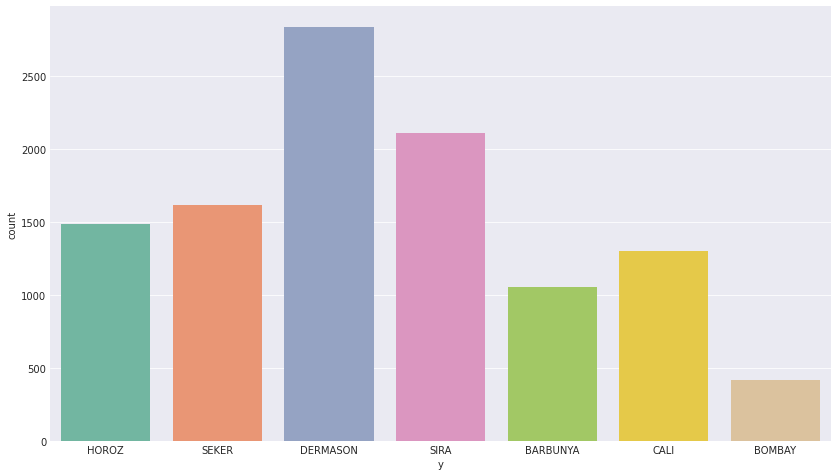

In [8]:
plt.figure(figsize=(14,8))
plt.style.use('seaborn-darkgrid')
sns.countplot(Beans.y,palette='Set2')
plt.show()

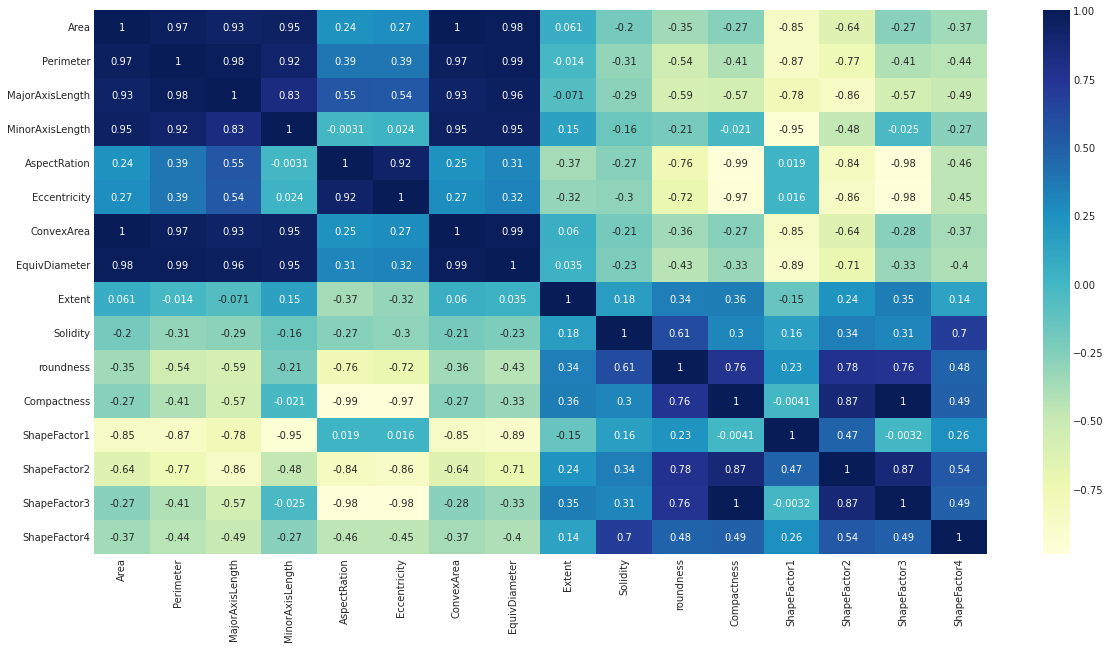

In [9]:

plt.figure(figsize=(20,10))
dataplot = sns.heatmap(Beans.corr(), cmap="YlGnBu", annot=True)  
# displaying heatmap
plt.show()

In [10]:
cols=['ShapeFactor1','ShapeFactor3','Compactness','EquivDiameter','Area',
                                'Perimeter','AspectRation']

Beans=Beans.drop(columns=cols)

In [11]:
#drop outlier
Beans = Beans[Beans['Eccentricity'] >= 0.25]
Beans = Beans[Beans['Solidity'] >= 0.96]
Beans = Beans[Beans['roundness'] >= 0.63]
Beans = Beans[Beans['ShapeFactor4'] >= 0.98]
#Beans_features = Beans_features[Beans_features['Area'] <= 16000]
Beans = Beans[Beans['Extent'] >= 0.70]
Beans = Beans[Beans['Extent'] >= 0.63]
Beans = Beans[Beans['ShapeFactor4'] >= 0.96]

In [12]:
#Beans['y']

In [13]:
#Beans.info()

In [14]:
# features_beans=Beans.drop(columns=['Area',
#                                 'Perimeter','roundness'])

#encoding for Beans_labels
# le =LabelEncoder()
# le.fit(Beans['y'])
# labels=le.transform(Beans['y'])
#len(labels)


In [15]:
features_beans=Beans.drop(columns=['y'],axis=1)


In [16]:
features_beans.columns

Index(['MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea',
       'Extent', 'Solidity', 'roundness', 'ShapeFactor2', 'ShapeFactor4'],
      dtype='object')

In [17]:
X_train,X_test,y_train,y_test = train_test_split(features_beans,Beans['y'],test_size=0.2,random_state=0,stratify=Beans['y'])

In [18]:
#Scalling
scalar=RobustScaler()
X_train = scalar.fit_transform(X_train)
X_test  = scalar.transform(X_test)

In [19]:
print("Before OverSampling, counts of label '1': {}".format(sum(X_train == 1)))
print("Before OverSampling, counts of label '0': {} n".format(sum(y_train == 0)))

Before OverSampling, counts of label '1': [0 0 0 0 0 0 0 0 0]
Before OverSampling, counts of label '0': 0 n


In [20]:
sm = SMOTE(random_state = 2)
x_train_res, y_train_res =sm.fit_resample(X_train, y_train.ravel())

In [21]:
print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape))
print('After OverSampling, the shape of train_y: {} n'.format(y_train_res .shape))

After OverSampling, the shape of train_X: (14609, 9)
After OverSampling, the shape of train_y: (14609,) n


Train F1_Score:  0.9532479978095695
Val F1_Score:  0.9293924466338259


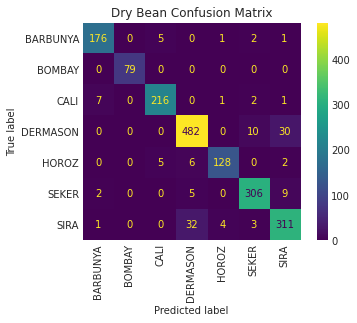

In [22]:
model_mlp= MLPClassifier(random_state=1, max_iter=500, alpha=0.05)

model_mlp.fit(x_train_res, y_train_res )

print("Train F1_Score: ", f1_score(y_train_res , model_mlp.predict(x_train_res), average='micro'))
print("Val F1_Score: ",   f1_score(y_test, model_mlp.predict(X_test), average='micro'))

# Displaying Results in Confusion Matrix
plot_confusion_matrix(model_mlp, X_test, y_test)
plt.xticks(rotation=90)
plt.grid(False)
plt.title('Dry Bean Confusion Matrix')
plt.show()

0:	learn: 1.5890080	total: 82.9ms	remaining: 49.7s
1:	learn: 1.3569974	total: 95.2ms	remaining: 28.5s
2:	learn: 1.1897994	total: 107ms	remaining: 21.3s
3:	learn: 1.0614147	total: 119ms	remaining: 17.7s
4:	learn: 0.9620547	total: 130ms	remaining: 15.5s
5:	learn: 0.8765212	total: 142ms	remaining: 14.1s
6:	learn: 0.8039160	total: 153ms	remaining: 13s
7:	learn: 0.7402383	total: 165ms	remaining: 12.2s
8:	learn: 0.6899405	total: 177ms	remaining: 11.6s
9:	learn: 0.6437369	total: 189ms	remaining: 11.2s
10:	learn: 0.6023749	total: 201ms	remaining: 10.7s
11:	learn: 0.5705383	total: 213ms	remaining: 10.4s
12:	learn: 0.5390002	total: 225ms	remaining: 10.2s
13:	learn: 0.5111236	total: 237ms	remaining: 9.93s
14:	learn: 0.4876269	total: 250ms	remaining: 9.74s
15:	learn: 0.4659154	total: 261ms	remaining: 9.54s
16:	learn: 0.4453138	total: 273ms	remaining: 9.37s
17:	learn: 0.4270419	total: 286ms	remaining: 9.24s
18:	learn: 0.4107498	total: 298ms	remaining: 9.13s
19:	learn: 0.3961330	total: 310ms	remaini

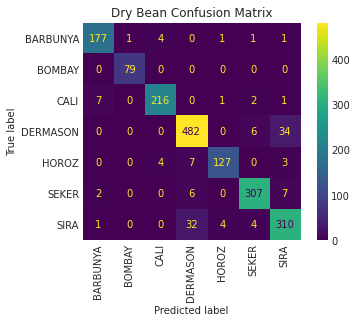

In [23]:
model_cb = cb.CatBoostClassifier(random_state=42, learning_rate=.1,l2_leaf_reg=4,iterations=600,depth=6)
model_cb.fit(X_train,y_train)
model_cb.fit(x_train_res, y_train_res )

print("Train F1_Score: ", f1_score(y_train_res , model_cb.predict(x_train_res), average='micro'))
print("Val F1_Score: ",   f1_score(y_test, model_cb.predict(X_test), average='micro'))
# Displaying Results in Confusion Matrix
plot_confusion_matrix(model_cb, X_test, y_test)
plt.xticks(rotation=90)
plt.grid(False)
plt.title('Dry Bean Confusion Matrix')
plt.show()

Train F1_Score:  0.9653638168252447
Val F1_Score:  0.9277504105090312


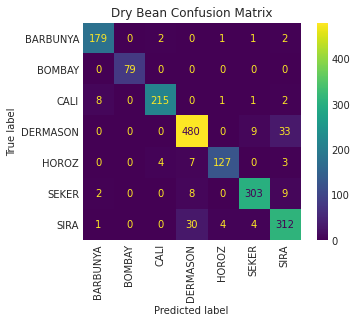

In [24]:
model_lgb = lgb.LGBMClassifier(random_state=42,silent=True,subsample=0.8, reg_lambda=1,reg_alpha=.1, num_leaves=5,
                             n_estimators=100, min_child_samples=5, max_depth=5, learning_rate=0.12,
                             colsample_bytree=0.5, boosting_type='goss', metric='multi_error', num_class=7)

model_lgb.fit(x_train_res, y_train_res )

print("Train F1_Score: ", f1_score(y_train_res , model_lgb.predict(x_train_res), average='micro'))
print("Val F1_Score: ",   f1_score(y_test, model_lgb.predict(X_test), average='micro'))
# Displaying Results in Confusion Matrix
plot_confusion_matrix(model_lgb, X_test, y_test)
plt.xticks(rotation=90)
plt.grid(False)
plt.title('Dry Bean Confusion Matrix')
plt.show()

0:	learn: 1.5498120	total: 15.4ms	remaining: 9.23s
1:	learn: 1.3040207	total: 30.1ms	remaining: 8.99s
2:	learn: 1.1396411	total: 45.4ms	remaining: 9.03s
3:	learn: 1.0136449	total: 60.4ms	remaining: 8.99s
4:	learn: 0.9018612	total: 76ms	remaining: 9.04s
5:	learn: 0.8155369	total: 90.7ms	remaining: 8.98s
6:	learn: 0.7387558	total: 105ms	remaining: 8.93s
7:	learn: 0.6786183	total: 120ms	remaining: 8.88s
8:	learn: 0.6268645	total: 135ms	remaining: 8.86s
9:	learn: 0.5805381	total: 150ms	remaining: 8.85s
10:	learn: 0.5403316	total: 165ms	remaining: 8.82s
11:	learn: 0.5077366	total: 180ms	remaining: 8.8s
12:	learn: 0.4751903	total: 195ms	remaining: 8.8s
13:	learn: 0.4478199	total: 210ms	remaining: 8.8s
14:	learn: 0.4227576	total: 227ms	remaining: 8.83s
15:	learn: 0.4016279	total: 242ms	remaining: 8.82s
16:	learn: 0.3810689	total: 256ms	remaining: 8.78s
17:	learn: 0.3630593	total: 271ms	remaining: 8.78s
18:	learn: 0.3471132	total: 286ms	remaining: 8.74s
19:	learn: 0.3324395	total: 301ms	remain

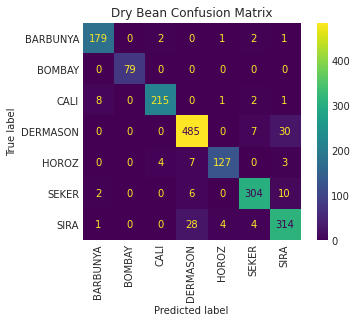

In [25]:
voting_model = VotingClassifier(estimators=[('lgb', model_lgb),('mlp', model_mlp),
                                            ('cb', model_cb)], voting='soft')

voting_model.fit(x_train_res, y_train_res)

print("F1_Score: ", f1_score(y_test, voting_model.predict(X_test), average='micro'))
# Displaying Results in Confusion Matrix
plot_confusion_matrix(voting_model, X_test, y_test)
plt.xticks(rotation=90)
plt.grid(False)
plt.title('Dry Bean Confusion Matrix')
plt.show()

In [26]:
Y_prediction=voting_model.predict(X_test)

In [27]:
# using accuracy_score metric to predict accuracy
repoSVM = classification_report(y_test, Y_prediction,output_dict=True)
repoSVM_df = pd.DataFrame(repoSVM).transpose()
repoSVM_df

,precision,recall,f1-score,support
BARBUNYA,0.942105,0.967568,0.954667,185.000000
BOMBAY,1.000000,1.000000,1.000000,79.000000
CALI,0.972851,0.947137,0.959821,227.000000
DERMASON,0.922053,0.929119,0.925573,522.000000
HOROZ,0.954887,0.900709,0.927007,141.000000
SEKER,0.952978,0.944099,0.948518,322.000000
SIRA,0.874652,0.894587,0.884507,351.000000
accuracy,0.932129,0.932129,0.932129,0.932129
macro avg,0.945647,0.940460,0.942870,1827.000000
weighted avg,0.932643,0.932129,0.932257,1827.000000


In [28]:
test_beans=pd.read_csv("../input/dry-beans-classification-iti-ai-pro-intake02/test.csv")
#test_beans.columnsumns

In [29]:
test_beans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2709 entries, 0 to 2708
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2709 non-null   int64  
 1   Area             2709 non-null   int64  
 2   Perimeter        2709 non-null   float64
 3   MajorAxisLength  2709 non-null   float64
 4   MinorAxisLength  2709 non-null   float64
 5   AspectRation     2709 non-null   float64
 6   Eccentricity     2709 non-null   float64
 7   ConvexArea       2709 non-null   int64  
 8   EquivDiameter    2709 non-null   float64
 9   Extent           2709 non-null   float64
 10  Solidity         2709 non-null   float64
 11  roundness        2709 non-null   float64
 12  Compactness      2709 non-null   float64
 13  ShapeFactor1     2709 non-null   float64
 14  ShapeFactor2     2709 non-null   float64
 15  ShapeFactor3     2709 non-null   float64
 16  ShapeFactor4     2709 non-null   float64
dtypes: float64(14)

In [30]:
cols=['ShapeFactor1','ShapeFactor3','Compactness','EquivDiameter','Area','Perimeter','AspectRation']
test_beans.drop(columns=cols,inplace=True)


In [31]:
test_beans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2709 entries, 0 to 2708
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2709 non-null   int64  
 1   MajorAxisLength  2709 non-null   float64
 2   MinorAxisLength  2709 non-null   float64
 3   Eccentricity     2709 non-null   float64
 4   ConvexArea       2709 non-null   int64  
 5   Extent           2709 non-null   float64
 6   Solidity         2709 non-null   float64
 7   roundness        2709 non-null   float64
 8   ShapeFactor2     2709 non-null   float64
 9   ShapeFactor4     2709 non-null   float64
dtypes: float64(8), int64(2)
memory usage: 211.8 KB


In [32]:
test=test_beans.drop(columns=['ID'])

In [33]:
# #drop outlier
# test = test[test['Eccentricity'] >= 0.25]
# test = test[test['Solidity'] >= 0.96]
# test = test[test['roundness'] >= 0.63]
# test = test[test['ShapeFactor4'] >= 0.98]
# #Beans_features = Beans_features[Beans_features['Area'] <= 16000]
# test = test[test['Extent'] >= 0.70]
# test = test[test['Extent'] >= 0.63]
# test = test[test['ShapeFactor4'] >= 0.96]

In [34]:
# test.info()

In [35]:
test_col=test.columns

In [36]:
scaler=RobustScaler()
test=scaler.fit_transform(test)

In [37]:
test=pd.DataFrame(test,columns=test_col)

In [38]:
#test.info()

In [39]:
y_predict=voting_model.predict(test)

len(y_predict)

2709

In [40]:
#y_predict
test['ID']=test_beans['ID']

In [41]:
test['y']=y_predict

In [42]:
test[["ID","y"]].to_csv("submission.csv",index=False)